### Recall and Precision Diagnostic Example

In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.core.pylabtools import figsize
figsize(10, 8)

### Confusion Matrix Numbers

二分问题，实例分成正类（positive）和负类（negative）

- 正类被预测为正类=>真正类（true positive）TP=>正确肯定的数目;
- 负类被预测为正类=>假正类（false positive）FP=>误报，给出的匹配是不正确的;
- 负类被预测为负类=>真负类（true negative）TN=>正确拒绝的非匹配对数；
- 正类被预测为负类=>假负类（false negative）FN=>漏报，没有正确找到的匹配的数目；


In [17]:
results = pd.DataFrame({'threshold': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        'tp': [50, 48, 47, 45, 44, 42, 36,  30,  20, 12, 0],
                        'fp': [50, 47, 40, 31, 23, 16, 12,  11,   4,  3,  0],
                        'tn': [0,   3,  9, 16, 22, 29, 34,  38,  43, 45, 50],
                        'fn': [0,   2,  4,  8, 11, 13, 18,  21,  33, 40, 50]
                       })
results

,fn,fp,threshold,tn,tp
0,0,50,0.0,0,50
1,2,47,0.1,3,48
2,4,40,0.2,9,47
3,8,31,0.3,16,45
4,11,23,0.4,22,44
5,13,16,0.5,29,42
6,18,12,0.6,34,36
7,21,11,0.7,38,30
8,33,4,0.8,43,20
9,40,3,0.9,45,12


### Calculate Precision, Recall, F1, TPR, FPR

#### TPR:真正类率，刻画分类器所识别出的正实例占所有正实例的比例
$$TPR = \frac{TP}{TP+FN}$$

#### FPR:负正类率，计算分类器错认为正类的负实例所占所有负实例的比例
$$FPR = \frac{FP}{FP+TN}$$

#### TNR:真负类率，也称为 specificity
$$TNR = TN/(FP+TN) = 1 - FPR$$

#### precision:正确率，正确预测的正实例占所有预测为正实例的比例
$$precision = \frac{TP}{TP+FP}$$

#### recall:召回率，正确预测的正实例占所有正实例的比例
$$recall = \frac{TP}{TP+FN}$$

#### F1分数，对precision和recall的整体评价
$$F1 = \frac{2\times precision\times recall}{precision+recall}$$

In [18]:
def calculate_metrics(results):
    roc = pd.DataFrame(index = results['threshold'], columns=['recall', 'precision', 'f1', 'tpr', 'fpr'])
    
    for i in results.iterrows():
        fn, fp, t, tn, tp = i[1] # 按行取
        assert tp+fp+tn+fn == 100
        
        recall = tp/(tp+fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        else:
            precision = tp/(tp+fp)
            true_positive_rate = tp/(tp+fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2*(precision*recall)/(precision+recall)
            
        false_positive_rate = fp/(fp+tn)
        
        roc.ix[t, 'recall'] = recall
        roc.ix[t, 'precision'] = precision
        roc.ix[t, 'f1'] = f1
        roc.ix[t, 'tpr'] = true_positive_rate
        roc.ix[t, 'fpr'] = false_positive_rate
        
    return roc

In [19]:
roc = calculate_metrics(results)
roc.reset_index()

,threshold,recall,precision,f1,tpr,fpr
0,0.0,1,0.5,0.666667,1,1
1,0.1,0.96,0.505263,0.662069,0.96,0.94
2,0.2,0.921569,0.54023,0.681159,0.921569,0.816327
3,0.3,0.849057,0.592105,0.697674,0.849057,0.659574
4,0.4,0.8,0.656716,0.721311,0.8,0.511111
5,0.5,0.763636,0.724138,0.743363,0.763636,0.355556
6,0.6,0.666667,0.75,0.705882,0.666667,0.26087
7,0.7,0.588235,0.731707,0.652174,0.588235,0.22449
8,0.8,0.377358,0.833333,0.519481,0.377358,0.0851064
9,0.9,0.230769,0.8,0.358209,0.230769,0.0625


### Receiver Operating Characteristic Curve

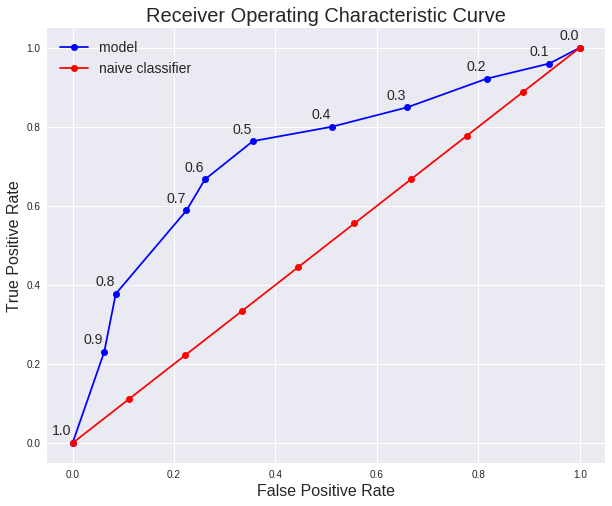

In [20]:
figsize(10, 8)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in results['threshold']]
plt.plot(roc['fpr'], roc['tpr'], 'bo-', label='model')
plt.plot(list(np.linspace(0, 1, num=10)), list(np.linspace(0, 1, num=10)), 'ro-', label='naive classifier')
for x,y,s in zip(roc['fpr'], roc['tpr'], thresholds):
    plt.text(x-0.04, y+0.02, s, fontdict={'size':14})

plt.legend(prop={'size':14})
plt.ylabel('True Positive Rate', size=16)
plt.xlabel('False Positive Rate', size=16)
plt.title('Receiver Operating Characteristic Curve', size=20)